Загальні втрати літаків: 317
3 найбільших добових втрат літаків: [ 9 16 17]
Втрати літаків влітку 2022 року: 26
Середнє значення втрат літаків (останні 300 днів війни): 306.49


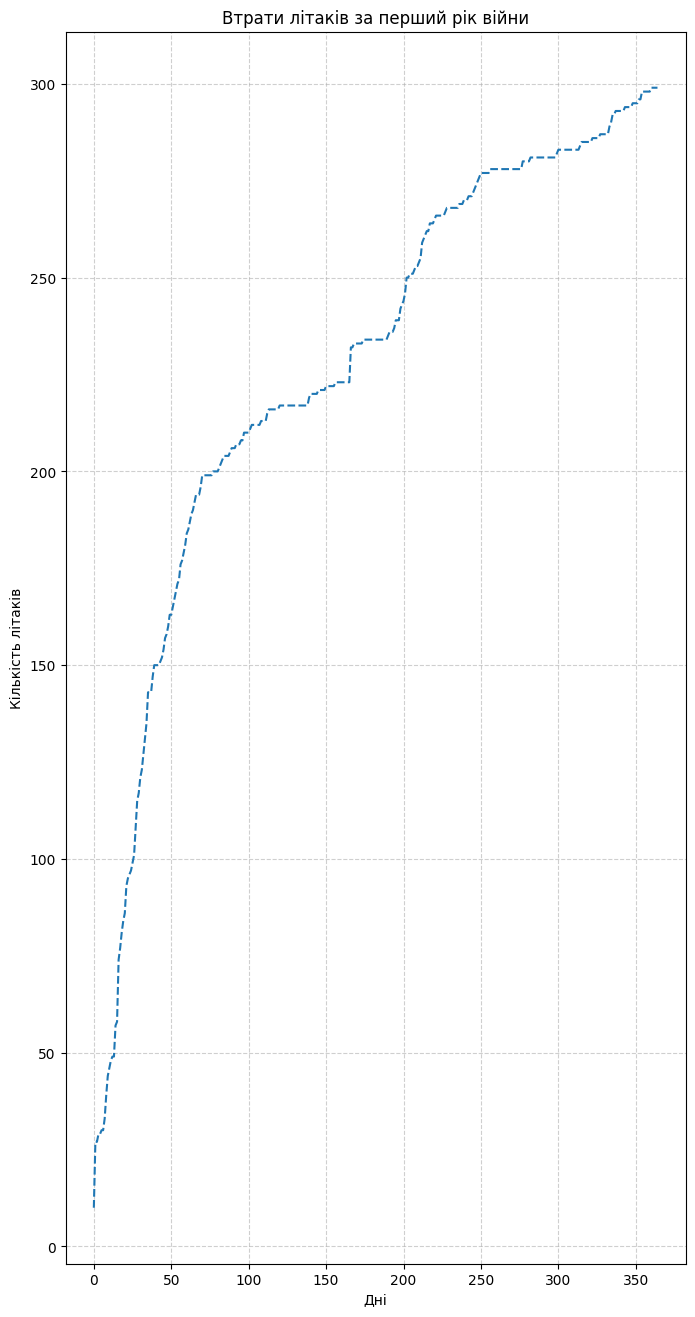

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def get_column_data(file_name, column_name, data_type=int):
    with open(file_name, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row[column_name] for row in reader]
    return np.array(data, dtype=data_type)

file_name = 'russia_losses_equipment.csv'
aircraft_data = get_column_data(file_name, 'aircraft')

def get_daily_losses():
    return np.diff(aircraft_data)

def get_top_3_daily_losses():
    return np.sort(get_daily_losses())[-3:]

def get_summer_losses():
    dates_data = get_column_data(file_name, 'date', data_type=str)
    start_date = '2022-06-01'
    end_date = '2022-08-31'
    summer_start_index = np.where(dates_data == start_date)[0][0]
    summer_end_index = np.where(dates_data == end_date)[0][0]

    return aircraft_data[summer_end_index] - aircraft_data[summer_start_index]

def get_average_losses_last_300():
    return np.mean(aircraft_data[-300:])

def show_first_year_losses():
    first_year_losses = aircraft_data[:365]
    dates = np.arange(len(first_year_losses))
    total_losses = aircraft_data[364]

    plt.plot(dates, first_year_losses, linestyle='--', label='Втрати літаків')
    plt.xlabel('Дні')
    plt.ylabel('Кількість літаків')
    plt.title('Втрати літаків за перший рік війни')
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.gcf().set_size_inches(8, 16)
    plt.gcf().set_dpi(100)

    plt.savefig('first_year_losses.png', dpi=100)
    plt.show()

print("Загальні втрати літаків:", aircraft_data[-1])
print("3 найбільших добових втрат літаків:", get_top_3_daily_losses())
print("Втрати літаків влітку 2022 року:", get_summer_losses())
print("Середнє значення втрат літаків (останні 300 днів війни):", get_average_losses_last_300())

show_first_year_losses()
